# Topic Modeling wiht Latent Semantic Analysis

Latent Semantic Analysis (LSA) is a method for finding latent similarities between documents treated as a bag of words by using a low rank approximation. It is used for document classification, clustering and retrieval. For example, LSA can be used to search for prior art given a new patent application. In this homework, we will implement a small library for simple latent semantic analysis as a practical example of the application of SVD. The ideas are very similar to PCA. SVD is also used in recommender systems in an similar fashion (for an SVD-based recommender system library, see [Surpise](http://surpriselib.com). 

We will implement a toy example of LSA to get familiar with the ideas. If you want to use LSA or similar methods for statistical language analysis, the most efficient Python libraries are probably [gensim](https://radimrehurek.com/gensim/) and [spaCy](https://spacy.io) - these also provide an online algorithm - i.e. the training information can be continuously updated. Other useful functions for processing natural language can be found in the [Natural Language Toolkit](http://www.nltk.org/).

**Note**: The SVD from scipy.linalg performs a full decomposition, which is inefficient since we only need to decompose until we get the first k singluar values. If the SVD from `scipy.linalg` is too slow, please use the `sparsesvd` function from the [sparsesvd](https://pypi.python.org/pypi/sparsesvd/) package to perform SVD instead.  You can install in the usual way with 
```
!pip install sparsesvd
```

Then import the following
```python
from sparsesvd import sparsesvd 
from scipy.sparse import csc_matrix 
```

and use as follows
```python
sparsesvd(csc_matrix(M), k=10)
```

**Exercise 1 (20 points)**.  Calculating pairwise distance matrices.

Suppose we want to construct a distance matrix between the rows of a matrix. For example, given the matrix 

```python
M = np.array([[1,2,3],[4,5,6]])
```

the distance matrix using Euclidean distance as the measure would be
```python
[[ 0.000  1.414  2.828]
 [ 1.414  0.000  1.414]
 [ 2.828  1.414  0.000]] 
```
if $M$ was a collection of column vectors.

Write a function to calculate the pairwise-distance matrix given the matrix $M$ and some arbitrary distance function. Your functions should have the following signature:
```
def func_name(M, distance_func):
    pass
```

0. Write a distance function for the Euclidean, squared Euclidean and cosine measures.
1. Write the function using looping for M as a collection of row vectors.
2. Write the function using looping for M as a collection of column vectors.
3. Wrtie the function using broadcasting for M as a collection of row vectors.
4. Write the function using broadcasting for M as a collection of column vectors. 

For 3 and 4, try to avoid using transposition (but if you get stuck, there will be no penalty for using transposition). Check that all four functions give the same result when applied to the given matrix $M$.

In [1]:
import numpy.linalg as la
import numpy as np
import string
import pandas as pd

1. Write a distance function for the Euclidean, squared Euclidean and cosine measures.

In [2]:
def Ecildean(A,B):
    """
    function for eucildean
    """
    res=np.sum((A-B)**2,-1)**0.5
    return(res)
def Ecildean_squared(A,B):
    """
    function for squared eucildean
    """
    res=np.sum((A-B)**2,-1)
    return(res)
def cosines(A,B):
    """
    function for cosince measures
    """
    res=(A * B).sum(axis=-1)/(la.norm(B,axis=-1) * la.norm(A,axis=-1))
    return(res)

**2.Write the function using looping for M as a collection of row vectors.**

In [3]:
def looprow(M, distance_func):
    '''
    function using looping for M as a collection of row vectors
    '''
    res=np.zeros(M.shape[0]**2).reshape(M.shape[0],M.shape[0])
    for i in range(M.shape[0]):
        for j in range(M.shape[0]):
            A=M[i]
            B=M[j]
            res[i,j]=distance_func(A,B)
    return(res)

In [4]:
M = np.array([[1,2,3],[4,5,6]])

In [5]:
looprow(M,Ecildean)

array([[ 0.        ,  5.19615242],
       [ 5.19615242,  0.        ]])

In [6]:
looprow(M,Ecildean_squared)

array([[  0.,  27.],
       [ 27.,   0.]])

In [7]:
looprow(M,cosines)

array([[ 1.        ,  0.97463185],
       [ 0.97463185,  1.        ]])

**3. Write the function using looping for M as a collection of column vectors**

In [8]:
def loopcol(M, distance_func):
    '''
    function using looping for M as a collection of column vectors
    '''
    M=M.T
    res=np.zeros(M.shape[0]**2).reshape(M.shape[0],M.shape[0])
    for i in range(M.shape[0]):
        for j in range(M.shape[0]):
            A=M[i]
            B=M[j]
            res[i,j]=distance_func(A,B)
    return(res)

In [9]:
loopcol(M,Ecildean)

array([[ 0.        ,  1.41421356,  2.82842712],
       [ 1.41421356,  0.        ,  1.41421356],
       [ 2.82842712,  1.41421356,  0.        ]])

In [10]:
loopcol(M,Ecildean_squared)

array([[ 0.,  2.,  8.],
       [ 2.,  0.,  2.],
       [ 8.,  2.,  0.]])

In [12]:
loopcol(M ,cosines)

array([[ 1.        ,  0.99083017,  0.97618706],
       [ 0.99083017,  1.        ,  0.99654576],
       [ 0.97618706,  0.99654576,  1.        ]])

**4. Wrtie the function using broadcasting for M as a collection of row vectors.**

In [11]:
def vectorrow(M,distance_func):
    '''
    function using broadcasting for M as a collection of row vectors.
    '''
    A=M[np.newaxis,:,:]
    B=M[:, np.newaxis]
    res=distance_func(A,B)
    return(res)

In [12]:
vectorrow(M,Ecildean)

array([[ 0.        ,  5.19615242],
       [ 5.19615242,  0.        ]])

In [13]:
vectorrow(M,Ecildean_squared)

array([[ 0, 27],
       [27,  0]])

In [16]:
vectorrow(M,cosines)

array([[ 1.        ,  0.97463185],
       [ 0.97463185,  1.        ]])

**5. Write the function using broadcasting for M as a collection of column vectors.**

In [14]:
def vectorcol(M,distance_func):
    '''
    function using broadcasting for M as a collection of column vectors
    '''
    M=M.T
    A=M[np.newaxis,:,:]
    B=M[:, np.newaxis]
    res=distance_func(A,B)
    return(res)

In [15]:
vectorcol(M,Ecildean)

array([[ 0.        ,  1.41421356,  2.82842712],
       [ 1.41421356,  0.        ,  1.41421356],
       [ 2.82842712,  1.41421356,  0.        ]])

In [16]:
vectorcol(M,Ecildean_squared)

array([[0, 2, 8],
       [2, 0, 2],
       [8, 2, 0]])

In [17]:
vectorcol(M,cosines)

array([[ 1.        ,  0.99083017,  0.97618706],
       [ 0.99083017,  1.        ,  0.99654576],
       [ 0.97618706,  0.99654576,  1.        ]])

**Exercise 2 (20 points)**. 

**Exercise 2 (20 points)**. Write 3 functions to calculate the term frequency (tf), the inverse document frequency (idf) and the product (tf-idf). Each function should take a single argument `docs`, which is a dictionary of (key=identifier, value=document text) pairs, and return an appropriately sized array. Convert '-' to ' ' (space), remove punctuation, convert text to lowercase and split on whitespace to generate a collection of terms from the document text.

- tf = the number of occurrences of term $i$ in document $j$
- idf = $\log \frac{n}{1 + \text{df}_i}$ where $n$ is the total number of documents and $\text{df}_i$ is the number of documents in which term $i$ occurs.

Print the table of tf-idf values for the following document collection

```
s1 = "The quick brown fox"
s2 = "Brown fox jumps over the jumps jumps jumps"
s3 = "The the the lazy dog elephant."
s4 = "The the the the the dog peacock lion tiger elephant"

docs = {'s1': s1, 's2': s2, 's3': s3, 's4': s4}
```

In [18]:
s1 = "The quick brown fox"
s2 = "Brown fox jumps over the jumps jumps jumps"
s3 = "The the the lazy dog elephant."
s4 = "The the the the the dog peacock lion tiger elephant"

docs = {'s1': s1, 's2': s2, 's3': s3, 's4': s4}

In [22]:
from collections import Counter
def pre(s1):
    '''
    the pre changes function 
    '''
    terms = s1.lower().replace('-', ' ').translate(str.maketrans('', '', string.punctuation)).split()
    return Counter(terms)

def tf(docs):
    '''
    the term frequency (tf) function
    '''
    d={names: pre(values) for names, values in docs.items()}
    res=pd.DataFrame(d).fillna(0)
    return(res)

def idf(docs):
    '''
    the inverse document frequency (idf) function
    '''
    term = tf(docs)
    N = len(docs)
    doc_freq = (term > 0).sum(axis=1)
    return np.log(N/(1 + doc_freq))

def tfidf(docs):
    '''
    the inverse document frequency (idf) function
    '''
    res=tf(docs).mul(idf(docs), axis=0)
    return(res)

In [23]:
tf(docs)

,s1,s2,s3,s4
brown,1.0,1.0,0.0,0.0
dog,0.0,0.0,1.0,1.0
elephant,0.0,0.0,1.0,1.0
fox,1.0,1.0,0.0,0.0
jumps,0.0,4.0,0.0,0.0
lazy,0.0,0.0,1.0,0.0
lion,0.0,0.0,0.0,1.0
over,0.0,1.0,0.0,0.0
peacock,0.0,0.0,0.0,1.0
quick,1.0,0.0,0.0,0.0


In [24]:
idf(docs)

brown       0.287682
dog         0.287682
elephant    0.287682
fox         0.287682
jumps       0.693147
lazy        0.693147
lion        0.693147
over        0.693147
peacock     0.693147
quick       0.693147
the        -0.223144
tiger       0.693147
dtype: float64

In [25]:
tfidf(docs)

,s1,s2,s3,s4
brown,0.287682,0.287682,0.000000,0.000000
dog,0.000000,0.000000,0.287682,0.287682
elephant,0.000000,0.000000,0.287682,0.287682
fox,0.287682,0.287682,0.000000,0.000000
jumps,0.000000,2.772589,0.000000,0.000000
lazy,0.000000,0.000000,0.693147,0.000000
lion,0.000000,0.000000,0.000000,0.693147
over,0.000000,0.693147,0.000000,0.000000
peacock,0.000000,0.000000,0.000000,0.693147
quick,0.693147,0.000000,0.000000,0.000000


**Exercise 3 (20 points)**. 

1. Write a function that takes a matrix $M$ and an integer $k$ as arguments, and reconstructs a reduced matrix using only the $k$ largest singular values. Use the `scipy.linagl.svd` function to perform the decomposition. This is the least squares approximation to the matrix $M$ in $k$ dimensions.

2. Apply the function you just wrote to the following term-frequency matrix for a set of $9$ documents using $k=2$ and print the reconstructed matrix $M'$.
```
M = np.array([[1, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 1, 0, 0, 0, 0],
       [0, 1, 1, 2, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 1]])
```

3. Calculate the pairwise correlation matrix for the original matrix M and the reconstructed matrix using $k=2$ singular values (you may use [scipy.stats.spearmanr](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html) to do the calculations). Consider the fist 5 sets of documents as one group $G1$ and the last 4 as another group $G2$ (i.e. first 5 and last 4 columns). What is the average within group correlation for $G1$, $G2$ and the average cross-group correlation for G1-G2 using either $M$ or $M'$. (Do not include self-correlation in the within-group calculations.).

#### 1. write the function

In [26]:
import scipy.linalg as la
import scipy.stats as stats
from sparsesvd import sparsesvd 
from scipy.sparse import csc_matrix

####  method 1, without using sparsesvd

In [27]:
def ksvd(M,k):
    '''
    a function that takes a matrix  MM  and an integer  kk  as arguments, 
    and reconstructs a reduced matrix using only the  kk  largest singular values
    '''
    u,s,v=la.svd(M)
    s=s[0:k]
    v1=v[0:k]
    n=u.shape[1]
    s1=np.r_[np.diag(s[0:k]),np.zeros((n-k)*k).reshape((n-k),k)]
    res= u @ s1 @ v1
    return(res)

#### method 2, by using sparsesvd

In [28]:
def ksvd2(M,k):
    '''
    a function that takes a matrix  MM  and an integer  kk  as arguments, 
    and reconstructs a reduced matrix using only the  kk  largest singular values
    '''
    u,s,v=sparsesvd(csc_matrix(M), k=k)
    res= u.T @ np.diag(s) @ v
    return(res)

#### 2. apply to M

In [29]:
M = np.array([[1, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 1, 0, 0, 0, 0],
       [0, 1, 1, 2, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 1]])

In [30]:
res1=ksvd(M,2)
res2=ksvd2(M,2)

In [31]:
(res1-res2) < 0.0000001  ## the two methods can get the same results 

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True]], dtype=bool)

In [32]:
Mprime=res1
Mprime

array([[ 0.16205797,  0.40049828,  0.37895454,  0.46756626,  0.17595367,
        -0.05265495, -0.11514284, -0.15910198, -0.09183827],
       [ 0.14058529,  0.36980077,  0.32899603,  0.40042722,  0.16497247,
        -0.03281545, -0.07056857, -0.09676827, -0.04298073],
       [ 0.15244948,  0.50500444,  0.35793658,  0.41010678,  0.23623173,
         0.02421652,  0.05978051,  0.0868573 ,  0.12396632],
       [ 0.25804933,  0.84112343,  0.60571995,  0.69735717,  0.39231795,
         0.03311801,  0.08324491,  0.12177239,  0.18737973],
       [ 0.44878975,  1.23436483,  1.0508615 ,  1.26579559,  0.55633139,
        -0.07378998, -0.15469383, -0.20959816, -0.04887954],
       [ 0.15955428,  0.5816819 ,  0.37521897,  0.41689768,  0.27654052,
         0.05590374,  0.1322185 ,  0.18891146,  0.21690761],
       [ 0.15955428,  0.5816819 ,  0.37521897,  0.41689768,  0.27654052,
         0.05590374,  0.1322185 ,  0.18891146,  0.21690761],
       [ 0.21846278,  0.54958058,  0.51096047,  0.62805802,  0

In [33]:
np.round(Mprime,2)

array([[ 0.16,  0.4 ,  0.38,  0.47,  0.18, -0.05, -0.12, -0.16, -0.09],
       [ 0.14,  0.37,  0.33,  0.4 ,  0.16, -0.03, -0.07, -0.1 , -0.04],
       [ 0.15,  0.51,  0.36,  0.41,  0.24,  0.02,  0.06,  0.09,  0.12],
       [ 0.26,  0.84,  0.61,  0.7 ,  0.39,  0.03,  0.08,  0.12,  0.19],
       [ 0.45,  1.23,  1.05,  1.27,  0.56, -0.07, -0.15, -0.21, -0.05],
       [ 0.16,  0.58,  0.38,  0.42,  0.28,  0.06,  0.13,  0.19,  0.22],
       [ 0.16,  0.58,  0.38,  0.42,  0.28,  0.06,  0.13,  0.19,  0.22],
       [ 0.22,  0.55,  0.51,  0.63,  0.24, -0.07, -0.14, -0.2 , -0.11],
       [ 0.1 ,  0.53,  0.23,  0.21,  0.27,  0.14,  0.31,  0.44,  0.42],
       [-0.06,  0.23, -0.14, -0.27,  0.14,  0.24,  0.55,  0.77,  0.66],
       [-0.06,  0.34, -0.15, -0.3 ,  0.2 ,  0.31,  0.69,  0.98,  0.85],
       [-0.04,  0.25, -0.1 , -0.21,  0.15,  0.22,  0.5 ,  0.71,  0.62]])

Calculate the pairwise correlation matrix for the original matrix M and the reconstructed matrix using $k=2$ singular values (you may use [scipy.stats.spearmanr](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html) to do the calculations). Consider the fist 5 sets of documents as one group $G1$ and the last 4 as another group $G2$ (i.e. first 5 and last 4 columns). What is the average within group correlation for $G1$, $G2$ and the average cross-group correlation for G1-G2 using either $M$ or $M'$. (Do not include self-correlation in the within-group calculations.).

In [34]:
rho, pval=stats.spearmanr(M)
rho2, pval2=stats.spearmanr(Mprime)

In [35]:
np.round(rho,2)

array([[ 1.  , -0.19,  0.  ,  0.07, -0.33, -0.17, -0.26, -0.33, -0.33],
       [-0.19,  1.  ,  0.  , -0.13,  0.58, -0.3 , -0.45, -0.58, -0.19],
       [ 0.  ,  0.  ,  1.  ,  0.44,  0.  , -0.21, -0.32, -0.41, -0.41],
       [ 0.07, -0.13,  0.44,  1.  , -0.33, -0.17, -0.26, -0.33, -0.33],
       [-0.33,  0.58,  0.  , -0.33,  1.  , -0.17, -0.26, -0.33, -0.33],
       [-0.17, -0.3 , -0.21, -0.17, -0.17,  1.  ,  0.67,  0.52, -0.17],
       [-0.26, -0.45, -0.32, -0.26, -0.26,  0.67,  1.  ,  0.77,  0.26],
       [-0.33, -0.58, -0.41, -0.33, -0.33,  0.52,  0.77,  1.  ,  0.56],
       [-0.33, -0.19, -0.41, -0.33, -0.33, -0.17,  0.26,  0.56,  1.  ]])

In [36]:
np.round(rho2,2)

array([[ 1.  ,  0.84,  1.  ,  1.  ,  0.72, -0.84, -0.84, -0.84, -0.8 ],
       [ 0.84,  1.  ,  0.84,  0.84,  0.97, -0.55, -0.55, -0.55, -0.48],
       [ 1.  ,  0.84,  1.  ,  1.  ,  0.72, -0.84, -0.84, -0.84, -0.8 ],
       [ 1.  ,  0.84,  1.  ,  1.  ,  0.72, -0.84, -0.84, -0.84, -0.8 ],
       [ 0.72,  0.97,  0.72,  0.72,  1.  , -0.39, -0.39, -0.39, -0.3 ],
       [-0.84, -0.55, -0.84, -0.84, -0.39,  1.  ,  1.  ,  1.  ,  0.98],
       [-0.84, -0.55, -0.84, -0.84, -0.39,  1.  ,  1.  ,  1.  ,  0.98],
       [-0.84, -0.55, -0.84, -0.84, -0.39,  1.  ,  1.  ,  1.  ,  0.98],
       [-0.8 , -0.48, -0.8 , -0.8 , -0.3 ,  0.98,  0.98,  0.98,  1.  ]])

With M

In [37]:
print('average within group correlation for  G1',np.mean(rho[:5, :5][np.tril_indices_from(rho[:5, :5], 1)]))
print('average within group correlation for  G2',np.mean(rho[5:, 5:][np.tril_indices_from(rho[5:, 5:], 1)]))
print('average cross-group correlation for G1-G2',rho[5:, :5].mean())

average within group correlation for  G1 0.264277239875
average within group correlation for  G2 0.662696798168
average cross-group correlation for G1-G2 -0.307562188906


With Mprime

In [38]:
print('average within group correlation for  G1',np.mean(rho2[:5, :5][np.tril_indices_from(rho2[:5, :5], 1)]))
print('average within group correlation for  G2',np.mean(rho2[5:, 5:][np.tril_indices_from(rho2[5:, 5:], 1)]))
print('average cross-group correlation for G1-G2',rho2[5:, :5].mean())

average within group correlation for  G1 0.897650209404
average within group correlation for  G2 0.993544916622
average cross-group correlation for G1-G2 -0.677281308193


**Exercise 4 (40 points)**. Clustering with LSA

1. Begin by loading a PubMed database of selected article titles using 'cPickle'. With the following:
```import cPickle
docs = cPickle.load(open('pubmed.pic'))```

    Create a tf-idf matrix for every term that appears at least once in any of the documents. What is the shape of the tf-idf matrix? 

2. Perform SVD on the tf-idf matrix to obtain $U \Sigma V^T$ (often written as $T \Sigma D^T$ in this context with $T$ representing the terms and $D$ representing the documents). If we set all but the top $k$ singular values to 0, the reconstructed matrix is essentially $U_k \Sigma_k V_k^T$, where $U_k$ is $m \times k$, $\Sigma_k$ is $k \times k$ and $V_k^T$ is $k \times n$. Terms in this reduced space are represented by $U_k \Sigma_k$ and documents by $\Sigma_k V^T_k$. Reconstruct the matrix using the first $k=10$ singular values.

3. Use agglomerative hierarchical clustering with complete linkage to plot a dendrogram and comment on the likely number of  document clusters with $k = 100$. Use the dendrogram function from [SciPy ](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.hierarchy.dendrogram.html).

4. Determine how similar each of the original documents is to the new document `mystery.txt`. Since $A = U \Sigma V^T$, we also have $V = A^T U S^{-1}$ using orthogonality and the rule for transposing matrix products. This suggests that in order to map the new document to the same concept space, first find the tf-idf vector $v$ for the new document - this must contain all (and only) the terms present in the existing tf-idx matrix. Then the query vector $q$ is given by $v^T U_k \Sigma_k^{-1}$. Find the 10 documents most similar to the new document and the 10 most dissimilar. 

Begin by loading a PubMed database of selected article titles using 'cPickle'. With the following: import cPickle
docs = cPickle.load(open('pubmed.pic'))
Create a tf-idf matrix for every term that appears at least once in any of the documents. What is the shape of the tf-idf matrix?

In [39]:
import pickle
docs=pickle.load(open('data/pubmed.pic', 'rb'))

In [40]:
df=tfidf(docs)

In [41]:
df.shape

(6488, 178)

the shape of tf-idf matrix is (6488, 178)

Perform SVD on the tf-idf matrix to obtain $U \Sigma V^T$ (often written as $T \Sigma D^T$ in this context with $T$ representing the terms and $D$ representing the documents). If we set all but the top $k$ singular values to 0, the reconstructed matrix is essentially $U_k \Sigma_k V_k^T$, where $U_k$ is $m \times k$, $\Sigma_k$ is $k \times k$ and $V_k^T$ is $k \times n$. Terms in this reduced space are represented by $U_k \Sigma_k$ and documents by $\Sigma_k V^T_k$. Reconstruct the matrix using the first $k=10$ singular values.


In [42]:
u,s,v=la.svd(df)

In [43]:
print(u.shape, s.shape, v.shape)

(6488, 6488) (178,) (178, 178)


In [44]:
res=ksvd2(df,10) # the function

In [45]:
np.round(res,2)

array([[ 0.04, -0.05,  0.18, ...,  0.02,  0.13, -0.21],
       [ 0.  ,  0.04,  0.01, ...,  0.04,  0.03,  0.09],
       [ 0.  , -0.08,  0.07, ..., -0.04, -0.01, -0.18],
       ..., 
       [ 0.01,  0.01,  0.02, ...,  0.01,  0.03,  0.01],
       [ 0.03,  0.12,  0.07, ...,  0.09,  0.13,  0.2 ],
       [ 0.01,  0.02,  0.02, ...,  0.01,  0.03,  0.03]])

In [46]:
res.shape

(6488, 178)

Use agglomerative hierarchical clustering with complete linkage to plot a dendrogram and comment on the likely number of  document clusters with $k = 100$. Use the dendrogram function from [SciPy ](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.hierarchy.dendrogram.html).


In [50]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt

In [48]:
u, s, v = sparsesvd(csc_matrix(df), k=100)
x = np.diag(s).dot(v).T
dists = pdist(x, metric='cosine') # computing the distance
links = linkage(dists) # computing the linkage

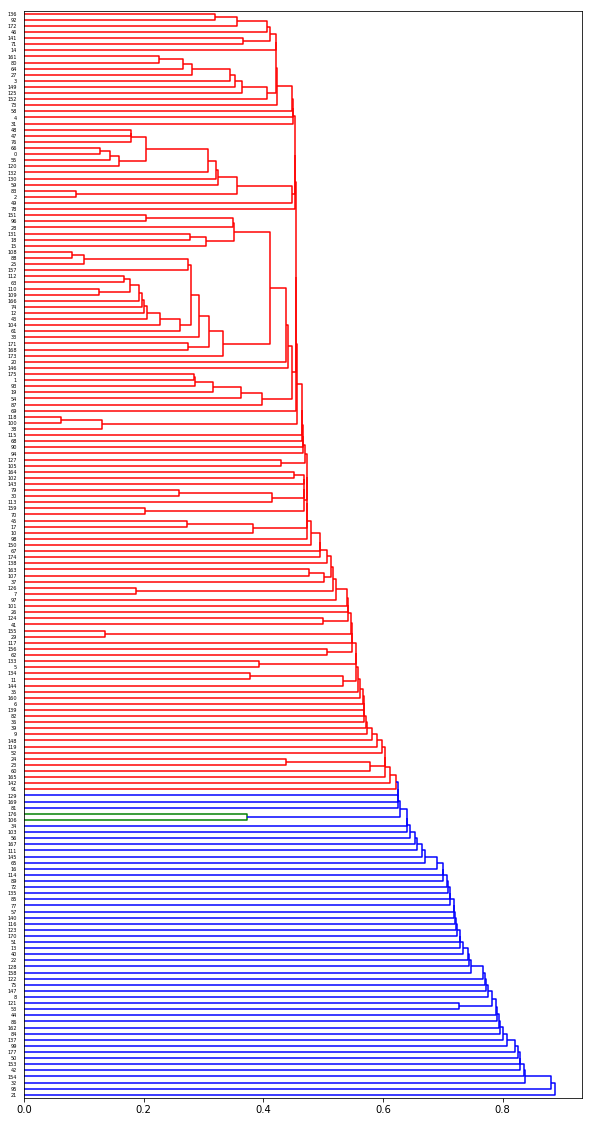

In [51]:
plt.figure(figsize=(10,20))
temp=dendrogram(links, orientation='right')

Determine how similar each of the original documents is to the new document `mystery.txt`. Since $A = U \Sigma V^T$, we also have $V = A^T U S^{-1}$ using orthogonality and the rule for transposing matrix products. This suggests that in order to map the new document to the same concept space, first find the tf-idf vector $v$ for the new document - this must contain all (and only) the terms present in the existing tf-idx matrix. Then the query vector $q$ is given by $v^T U_k \Sigma_k^{-1}$. Find the 10 documents most similar to the new document and the 10 most dissimilar. 

In [53]:
newdoc = {'mystery': open('data/mystery.txt').read()}
newterm = tfidf(newdoc)

In [54]:
total=df.join(newterm).fillna(0)

In [55]:
mystery=total.mystery
q=mystery.T @ (u.T @ np.diag(1/s))

In [56]:
res=np.c_[x.T,q]

In [57]:
measure = loopcol(res,cosines)[0:178,178:179]

In [58]:
ranks=pd.DataFrame(list(df.T.index)[0:178])
ranks['sames']=measure
ranks.columns=['num','sames']
ranks2=ranks.sort_values('sames').reset_index(drop=True)

### 10 documents most similar to the new document

In [59]:
ranks2.head(10)

,num,sames
0,Diabetes Numeracy and Blood Glucose Control: A...,-0.770095
1,Feasibility of the SMART Project: A Text Messa...,-0.695985
2,Health Care Utilization Among U.S. Adults With...,-0.669142
3,Demographic Disparities Among Medicare Benefic...,-0.638972
4,Disparities in Postpartum Follow-Up in Women W...,-0.638630
5,Prevalence and Determinants of Anemia in Older...,-0.616161
6,Outcomes of a Diabetes Education Program for R...,-0.607281
7,Gestational Diabetes Mellitus Screening Using ...,-0.586542
8,Evaluating the toxic and beneficial effects of...,-0.571692
9,Efficacy and Safety of Saxagliptin as Add-On T...,-0.564320


In [60]:
list(ranks2.head(10).num)

['Diabetes Numeracy and Blood Glucose Control: Association With Type of Diabetes and Source of Care.',
 'Feasibility of the SMART Project: A Text Message Program for Adolescents With Type 1 Diabetes.',
 'Health Care Utilization Among U.S. Adults With Diagnosed Diabetes, 2013.',
 'Demographic Disparities Among Medicare Beneficiaries with Type 2 Diabetes Mellitus in 2011: Diabetes Prevalence, Comorbidities, and Hypoglycemia Events.',
 'Disparities in Postpartum Follow-Up in Women With Gestational Diabetes Mellitus.',
 'Prevalence and Determinants of Anemia in Older People With Diabetes Attending an Outpatient Clinic: A Cross-Sectional Audit.',
 'Outcomes of a Diabetes Education Program for Registered Nurses Caring for Individuals With Diabetes.',
 'Gestational Diabetes Mellitus Screening Using the One-Step Versus Two-Step Method in a High-Risk Practice.',
 'Evaluating the toxic and beneficial effects of lichen extracts in normal and diabetic rats.',
 'Efficacy and Safety of Saxagliptin a

### 10 documents most dissimilar to the new document

In [61]:
ranks2.tail(10)

,num,sames
168,Phenotypic profiling of CD8 + T cells during P...,-0.014997
169,ERK1/2 promoted proliferation and inhibited ap...,-0.013974
170,Avian haemosporidians from Neotropical highlan...,-0.012005
171,Nerve Growth Factor Potentiates Nicotinic Syna...,-0.001146
172,Dopamine Increases CD14+CD16+ Monocyte Migrati...,0.002367
173,Crystal Structures of the Carboxyl cGMP Bindin...,0.020708
174,Antibodies to the Plasmodium falciparum protei...,0.024353
175,CD4 T-cell subsets in malaria: TH1/TH2 revisited.,0.035444
176,CD40 Is Required for Protective Immunity again...,0.077497
177,IRGM3 contributes to immunopathology and is re...,0.082579


In [62]:
list(ranks2.tail(10).num)

['Phenotypic profiling of CD8 + T cells during Plasmodium vivax blood-stage infection.',
 'ERK1/2 promoted proliferation and inhibited apoptosis of human cervical cancer cells and regulated the expression of c-Fos and c-Jun proteins.',
 'Avian haemosporidians from Neotropical highlands: Evidence from morphological and molecular data.',
 'Nerve Growth Factor Potentiates Nicotinic Synaptic Transmission in Mouse Airway Parasympathetic Neurons.',
 'Dopamine Increases CD14+CD16+ Monocyte Migration and Adhesion in the Context of Substance Abuse and HIV Neuropathogenesis.',
 'Crystal Structures of the Carboxyl cGMP Binding Domain of the Plasmodium falciparum cGMP-dependent Protein Kinase Reveal a Novel Capping Triad Crucial for Merozoite Egress.',
 'Antibodies to the Plasmodium falciparum proteins MSPDBL1 and MSPDBL2 opsonise merozoites, inhibit parasite growth and predict protection from clinical malaria.',
 'CD4 T-cell subsets in malaria: TH1/TH2 revisited.',
 'CD40 Is Required for Protecti

Notes on the Pubmed articles
----

These were downloaded with the following script.

```python
from Bio import Entrez, Medline
Entrez.email = "YOUR EMAIL HERE"
import cPickle

try:
    docs = cPickle.load(open('pubmed.pic'))
except Exception, e:
    print e

    docs = {}
    for term in ['plasmodium', 'diabetes', 'asthma', 'cytometry']:
        handle = Entrez.esearch(db="pubmed", term=term, retmax=50)
        result = Entrez.read(handle)
        handle.close()
        idlist = result["IdList"]
        handle2 = Entrez.efetch(db="pubmed", id=idlist, rettype="medline", retmode="text")
        result2 = Medline.parse(handle2)
        for record in result2:
            title = record.get("TI", None)
            abstract = record.get("AB", None)
            if title is None or abstract is None:
                continue
            docs[title] = '\n'.join([title, abstract])
            print title
        handle2.close()
    cPickle.dump(docs, open('pubmed.pic', 'w'))
docs.values()
```